In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#Checking for null values in the data
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df["CRIM"].fillna(df["CRIM"].mean(),inplace=True)
df["ZN"].fillna(df["ZN"].mean(),inplace=True)
df["INDUS"].fillna(df["INDUS"].mean(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)


In [5]:
x= df.drop("MEDV",axis=1)
y = df["MEDV"]

In [6]:
x= df.drop("MEDV",axis=1)
y = df["MEDV"]
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=1,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(x_test)
ytest_hat=lr.predict(x_test)
ytrain_hat=lr.predict(x_train)
print('mse :',mean_squared_error(y_test, y_pred))
print('r2 :',r2_score(y_test, y_pred))
print('bais:R2 score:',r2_score(y_train,ytrain_hat))
print('Variance:R2 score:',r2_score(y_test,ytest_hat))

45.20924381237912
[-1.13589816e-01  5.88985693e-02  8.21914982e-04  2.74817861e+00
 -2.05761212e+01  3.10663351e+00 -1.67855861e-02 -1.66121214e+00
  2.80108323e-01 -9.88937754e-03 -9.87240472e-01  6.13502168e-03
 -4.97801530e-01]
mse : 21.349418797904953
r2 : 0.7670663000471305
bais:R2 score: 0.7034951400506068
Variance:R2 score: 0.7670663000471305


In [54]:
from sklearn.preprocessing import PolynomialFeatures
#x = df[["TV","radio"]]
#y = df["sales"]
pf = PolynomialFeatures(2)
# Degree formula will be like
# y = TV x theta + TV * TV x theta + Radio x theta + Radio x radio x theta
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, 
                        y, random_state=1,test_size=0.3)
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.00956458294941476
0.7886815901216864


In [55]:
pf = PolynomialFeatures(2)
# Degree formula will be like
# y = TV x theta + TV * TV x theta + Radio x theta + Radio x radio x theta
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, 
                        y, random_state=1,test_size=0.3)
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(x_test)
ytest_hat=lr.predict(x_test)
ytrain_hat=lr.predict(x_train)
print('mse :',mean_squared_error(y_test, y_pred))
print('r2 :',r2_score(y_test, y_pred))
print('bais:R2 score:',r2_score(y_train,ytrain_hat))
print('Variance:R2 score:',r2_score(y_test,ytest_hat))

0.00956458294941476
0.7886815901216864
-1.5468866648501411
[ 2.63307061e-14  1.59553456e+00  9.17205615e-01 -3.01747412e-01
 -4.58741275e-01  2.55531169e-01  2.58562474e+00  5.56248930e-01
 -1.09302865e+00  1.00674897e+00 -2.42387430e-01  4.12446683e-01
  1.32082352e+00  1.08563366e+00  1.04891891e+00 -6.11513584e+00
 -6.59579619e-01  1.32517332e-01 -1.85953091e+00  2.31577470e+00
 -1.29465858e+00 -3.66947889e-01 -7.44419278e+00  6.38334753e+00
 -1.20525491e-01  9.82528372e-02  1.36846800e+00  4.15774289e-05
 -2.84569268e-01 -2.51063158e-02 -9.16240126e-01 -1.11905296e-01
  2.86437240e-01 -6.91802036e-01 -8.94333528e-02  7.51138575e-01
  5.42144835e-02 -5.52490475e-01 -5.24566772e-01  5.16020158e-01
  1.45595068e-01  1.69598339e-01  1.64780871e-01  3.61362271e-01
  7.94827451e-01 -1.06903631e+00  5.12508606e-01 -1.64763125e-01
 -2.40783590e-01 -8.80803102e-01  6.64331111e-01 -1.15015971e-01
 -4.56253154e-01  2.19227424e-02  2.73985329e-01  3.57550225e-02
  5.79353623e-02  1.93444750e-0

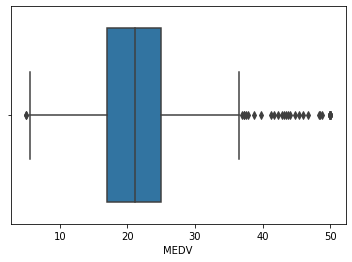

In [7]:
sns.boxplot(data=df, x="MEDV")
plt.show()

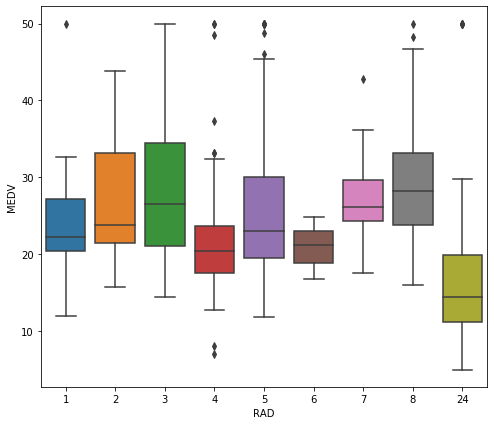

In [8]:
# in the above diagram that all the values above 28000 are outliers which isn't correct 
# therefore we plot price vs make
plt.figure(figsize=(8,7))
sns.boxplot(data=df,x="RAD",y="MEDV")
plt.show()

In [9]:
# checking outliers for isuzu make
df[(df['RAD']=='24') & (df['MEDV'] >40)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [12]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [13]:
from scipy.stats import skew

CRIM : 5.302590597730194


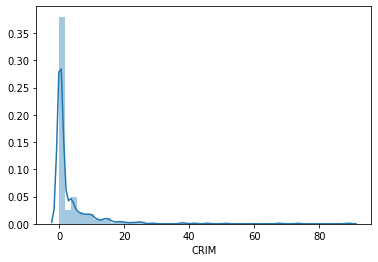

----------------------------------------------
ZN : 2.2954640272490936


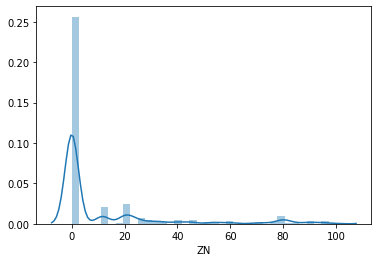

----------------------------------------------
INDUS : 0.3089512813504196


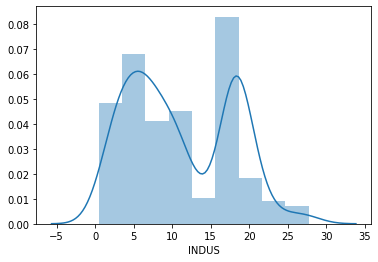

----------------------------------------------
CHAS : 3.440525092805923


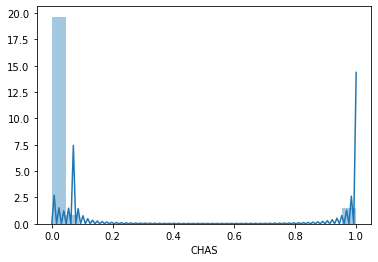

----------------------------------------------
NOX : 0.7271441597740318


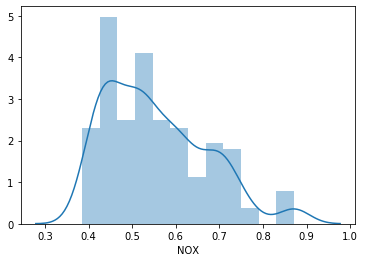

----------------------------------------------
RM : 0.4024146680249623


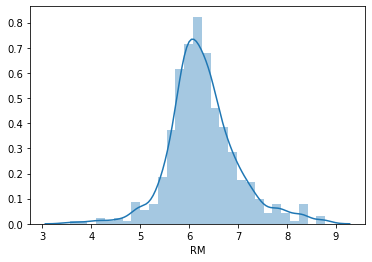

----------------------------------------------
AGE : -0.5924982697109922


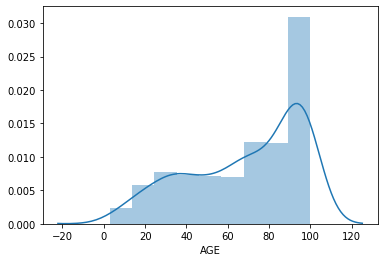

----------------------------------------------
DIS : 1.0087787565152246


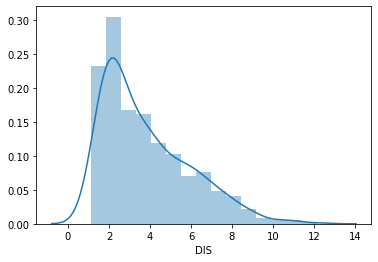

----------------------------------------------
RAD : 1.0018334924536951


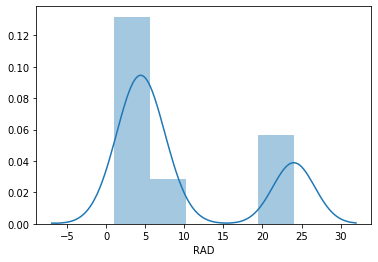

----------------------------------------------
TAX : 0.6679682687237768


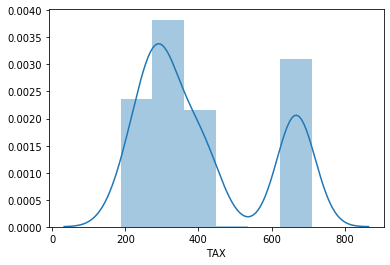

----------------------------------------------
PTRATIO : -0.7999445320367449


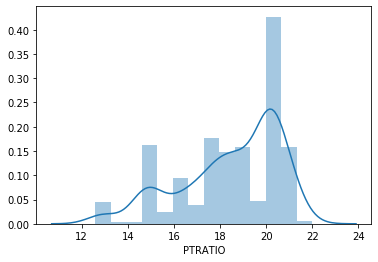

----------------------------------------------
B : -2.8817983452627716


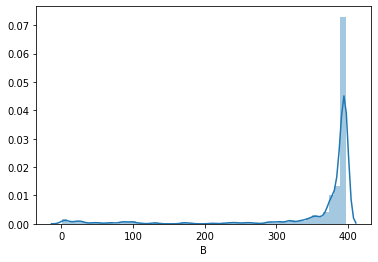

----------------------------------------------
LSTAT : 0.9245399549945409


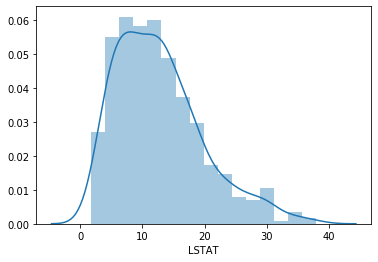

----------------------------------------------
MEDV : 1.104810822864635


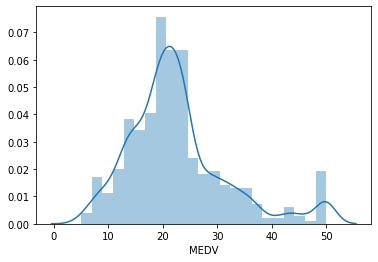

----------------------------------------------


In [14]:
for col in df:
    try:
        plt.figure()
        print(col,':',skew(df[col]))
        sns.distplot(df[col])
        plt.show()
    except:
        pass
    print('----------------------------------------------')

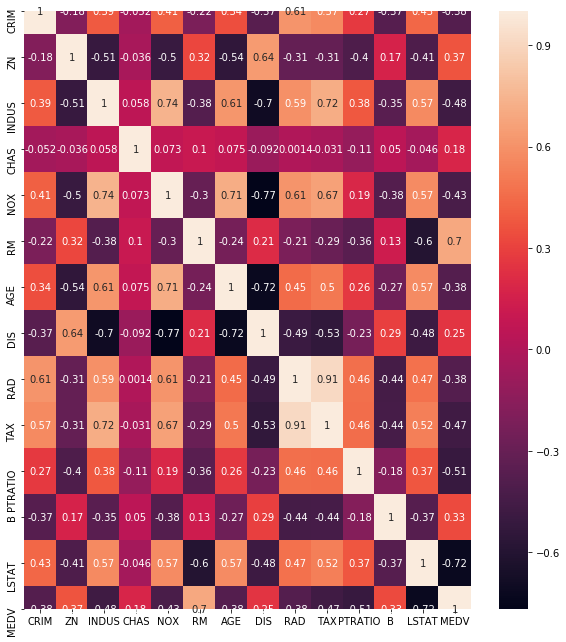

In [15]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# Reduce or remove skewness for only does columns 
# that don't have corelation with target
# from heat map we understand there is no relation 
# of price with symboling and normalized-losses
# Removing skewness 
df["CHAS"] = np.sqrt(df["CHAS"])


skewness:  2.602627629644628


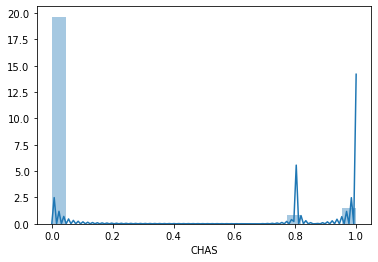

In [23]:
print("skewness: ",skew(df["CHAS"]))
sns.distplot(df["CHAS"])
plt.show()

In [26]:
x= df.drop("MEDV",axis=1)
y = df["MEDV"]
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=1,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(x_test)
ytest_hat=lr.predict(x_test)
ytrain_hat=lr.predict(x_train)
print('mse :',mean_squared_error(y_test, y_pred))
print('r2 :',r2_score(y_test, y_pred))
print('bais:R2 score:',r2_score(y_train,ytrain_hat))
print('Variance:R2 score:',r2_score(y_test,ytest_hat))

44.8042357567272
[-1.15028325e-01  6.01573443e-02  2.94760586e-03  1.76969518e+00
 -2.05025239e+01  3.20172528e+00 -1.70645720e-02 -1.69837163e+00
  2.86571600e-01 -1.06327360e-02 -9.84100367e-01  6.30629833e-03
 -4.94057083e-01]
mse : 21.549643545326003
r2 : 0.7648817398171588
bais:R2 score: 0.7004905834120292
Variance:R2 score: 0.7648817398171588


In [27]:
from sklearn.preprocessing import MinMaxScaler
# x_new = (x_old - min) / (max-min)
# all the data will be scaled down between 0 to 1

In [28]:
house = df.copy()
for col in house:
    mx = MinMaxScaler()
    house[col] = mx.fit_transform(house[[col]])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


In [31]:
from sklearn.preprocessing import StandardScaler
# this implement the concept of Standarization
ss = StandardScaler()
#ss.fit_transform(cars_num[["normalized-losses"]])

In [32]:
#cars_ss = cars_new.copy()
for col in house:
    ss = StandardScaler()
    house[col] = mx.fit_transform(house[[col]])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


In [33]:
x= house.drop("MEDV",axis=1)
y = house["MEDV"]
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=1,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(x_test)
ytest_hat=lr.predict(x_test)
ytrain_hat=lr.predict(x_train)
print('mse :',mean_squared_error(y_test, y_pred))
print('r2 :',r2_score(y_test, y_pred))
print('bais:R2 score:',r2_score(y_train,ytrain_hat))
print('Variance:R2 score:',r2_score(y_test,ytest_hat))

0.5864589656426445
[-0.22742347  0.13368299  0.0017869   0.03932656 -0.22142726  0.37132898
 -0.03682155 -0.41504051  0.14646993 -0.1238123  -0.20556763  0.05557671
 -0.39788064]
mse : 0.01064179928164241
r2 : 0.7648817398171601
bais:R2 score: 0.7004905834120292
Variance:R2 score: 0.7648817398171601


In [34]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [35]:
l2 = Ridge(0.05)
l2.fit(x_train,y_train)
l2.coef_

array([-0.22004934,  0.13079194,  0.00065615,  0.039719  , -0.21776698,
        0.3703827 , -0.03663619, -0.40725753,  0.14305408, -0.12082948,
       -0.20535572,  0.05607297, -0.39727926])

In [37]:
l2.fit(x_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

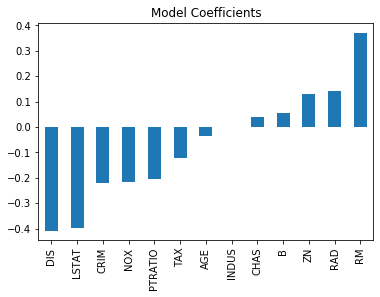

In [38]:
#check the coefficients of the Linear model
predictors = x_train.columns
coef = pd.Series(l2.coef_, predictors).sort_values()
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

[-0.04636826  0.05395032 -0.04611288  0.05287195 -0.07100245  0.19921002
 -0.04631273 -0.08573317  0.01963452 -0.04339514 -0.15179487  0.05744206
 -0.24542459]


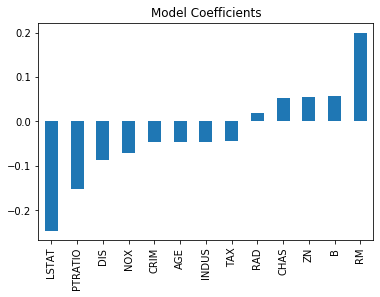

In [39]:
# Ridge Regression with lambda/alpha value = 10
l2 = Ridge(10)
l2.fit(x_train,y_train)
print(l2.coef_)
predictors = x_train.columns
coef = pd.Series(l2.coef_, predictors).sort_values()
# plt.figure(figsize=(10,8))
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

CRIM      -0.0
ZN         0.0
INDUS     -0.0
CHAS       0.0
NOX       -0.0
RM         0.0
AGE       -0.0
DIS        0.0
RAD       -0.0
TAX       -0.0
PTRATIO   -0.0
B          0.0
LSTAT     -0.0
dtype: float64


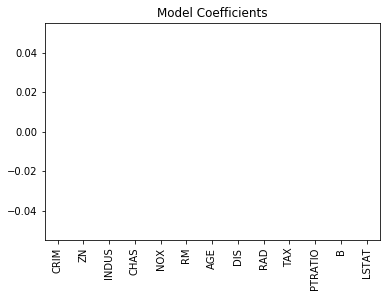

In [44]:
# Lasso helps in feature selection
l1 = Lasso(1)
l1.fit(x_train,y_train)
l1.coef_
predictors = x_train.columns
coef = pd.Series(l1.coef_, predictors).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

In [45]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(x_train,y_train)
    print(i,":",l2.score(x_test,y_test))

0 : 0.7648817398171603
1 : 0.7565960201552278
2 : 0.7404068470771559
3 : 0.7232278190815163
4 : 0.7064777010496159
5 : 0.6905475207562721
6 : 0.6755344987026282
7 : 0.6614328401842202
8 : 0.6481976998473298
9 : 0.6357702422870055
10 : 0.6240883975126521
11 : 0.613091654581782
12 : 0.6027231496294803
13 : 0.5929304586728
14 : 0.5836657548212991
15 : 0.5748856558031508
16 : 0.5665509287876418
17 : 0.5586261397044021
18 : 0.5510792926143104
19 : 0.5438814823487657
20 : 0.5370065714589414
21 : 0.530430895853619
22 : 0.5241329998964201
23 : 0.5180933998428293
24 : 0.5122943735780848
25 : 0.5067197742449361
26 : 0.5013548652815412
27 : 0.49618617448320157
28 : 0.49120136487531874
29 : 0.4863891203918632
30 : 0.48173904456722333
31 : 0.47724157065513295
32 : 0.472887881779229
33 : 0.46866983989259076
34 : 0.46457992247767776
35 : 0.4606111660540636
36 : 0.45675711568055
37 : 0.4530117797422356
38 : 0.449369589403591
39 : 0.44582536218714686
40 : 0.44237426920554856
41 : 0.4390118056338277
42 

In [46]:
for i in range(100,500,50):
    l1 = Lasso(alpha=i)
    l1.fit(x_train,y_train)
    print(i,":",l1.score(x_test,y_test))

100 : -0.0045026262274585616
150 : -0.0045026262274585616
200 : -0.0045026262274585616
250 : -0.0045026262274585616
300 : -0.0045026262274585616
350 : -0.0045026262274585616
400 : -0.0045026262274585616
450 : -0.0045026262274585616


In [49]:
l2 = Ridge(alpha=0)
l2.fit(x_train,y_train)
print(l2.score(x_test,y_test))

0.7648817398171603
